In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras

In [2]:
#Load the dataset
df = pd.read_csv("aw_fb_data.csv")
df

,Unnamed: 0,X1,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,3666,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,6261,3667,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,6262,3668,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,6263,3669,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [3]:
#To print the head of csv
df.head(0)

,Unnamed: 0,X1,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   heart_rate            6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

In [5]:
df.isnull().sum()

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
heart_rate              0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [6]:
#Split the data
y=df['heart_rate']
y

0       78.531302
1       78.453390
2       78.540825
3       78.628260
4       78.715695
          ...    
6259    35.000000
6260    35.000000
6261    35.000000
6262    35.000000
6263    35.000000
Name: heart_rate, Length: 6264, dtype: float64

In [7]:
#Delete unnecessary column
x=df.drop(['X1','heart_rate','device','activity','Unnamed: 0'], axis=1)
x

,age,gender,height,weight,steps,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
0,20,1,168.0,65.4,10.771429,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692
1,20,1,168.0,65.4,11.475325,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088
2,20,1,168.0,65.4,12.179221,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287
3,20,1,168.0,65.4,12.883117,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286
4,20,1,168.0,65.4,13.587013,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,46,0,157.5,71.4,1.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000
6260,46,0,157.5,71.4,1.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000
6261,46,0,157.5,71.4,1.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000
6262,46,0,157.5,71.4,1.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [8]:
x.shape

(6264, 15)

In [9]:
y.shape


(6264,)

In [10]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [11]:
# define dataset
x, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)


In [12]:
# number of input columns
n_inputs = x.shape[1]

In [13]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [14]:
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [15]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

In [16]:
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

In [17]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [18]:
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [19]:
# output layer
output = Dense(n_inputs, activation='linear')(d)

In [20]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [21]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')


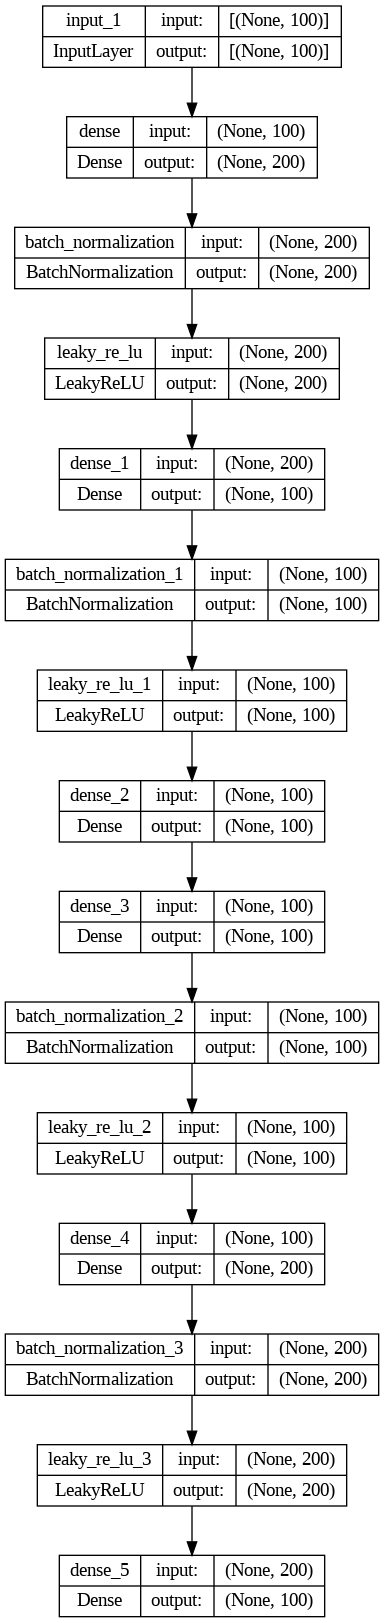

In [22]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [23]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_test,y_test))


Epoch 1/20
42/42 [==============================] - 4s 20ms/step - loss: 0.3454 - val_loss: 0.3094
Epoch 2/20
42/42 [==============================] - 0s 11ms/step - loss: 0.1267 - val_loss: 0.2384
Epoch 3/20
42/42 [==============================] - 0s 9ms/step - loss: 0.1032 - val_loss: 0.2034
Epoch 4/20
42/42 [==============================] - 0s 7ms/step - loss: 0.1003 - val_loss: 0.1528
Epoch 5/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0869 - val_loss: 0.1380
Epoch 6/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0904 - val_loss: 0.1050
Epoch 7/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0689 - val_loss: 0.1011
Epoch 8/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0871 - val_loss: 0.0894
Epoch 9/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0804 - val_loss: 0.0796
Epoch 10/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0690 - val_loss: 0.0727
Epoch 11/20
42/42

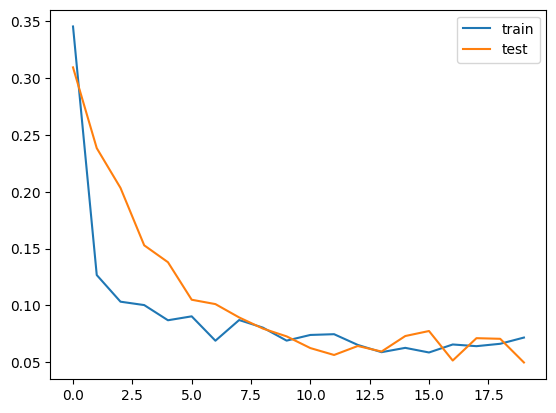

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [25]:
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print("The accuracy is: " ,acc)


The accuracy is:  0.8939393939393939


In [26]:
import os

import tensorflow as tf
from tensorflow import keras

In [27]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('encoder.h5')

# Show the model architecture
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 200)               20200     
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                          

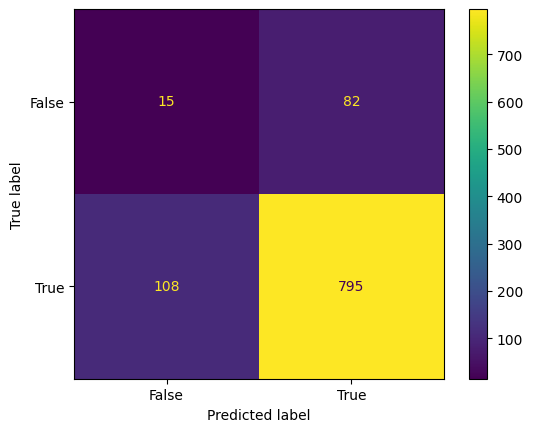

In [28]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

X = numpy.random.binomial(1,.9,size = 1000)
y = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(X, y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()